# xG Dataset - EDA

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Loading data

In [ ]:
df = pd.read_csv("C:/Users/cerve/Desktop/DP/xG/Data/understat.csv")
df.head()

,Unnamed: 0,Unnamed: 1,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


## Basic informations about dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    684 non-null    object 
 1   Unnamed: 1    684 non-null    int64  
 2   position      684 non-null    int64  
 3   team          684 non-null    object 
 4   matches       684 non-null    int64  
 5   wins          684 non-null    int64  
 6   draws         684 non-null    int64  
 7   loses         684 non-null    int64  
 8   scored        684 non-null    int64  
 9   missed        684 non-null    int64  
 10  pts           684 non-null    int64  
 11  xG            684 non-null    float64
 12  xG_diff       684 non-null    float64
 13  npxG          684 non-null    float64
 14  xGA           684 non-null    float64
 15  xGA_diff      684 non-null    float64
 16  npxGA         684 non-null    float64
 17  npxGD         684 non-null    float64
 18  ppda_coef     684 non-null    

- 684 entries
- 24 columns

In [14]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'position', 'team', 'matches', 'wins',
       'draws', 'loses', 'scored', 'missed', 'pts', 'xG', 'xG_diff', 'npxG',
       'xGA', 'xGA_diff', 'npxGA', 'npxGD', 'ppda_coef', 'oppda_coef', 'deep',
       'deep_allowed', 'xpts', 'xpts_diff'],
      dtype='object')

### Number of duplicates and missing values

In [15]:
df.duplicated().sum()


0

In [16]:
df.isna().sum()

Unnamed: 0      0
Unnamed: 1      0
position        0
team            0
matches         0
wins            0
draws           0
loses           0
scored          0
missed          0
pts             0
xG              0
xG_diff         0
npxG            0
xGA             0
xGA_diff        0
npxGA           0
npxGD           0
ppda_coef       0
oppda_coef      0
deep            0
deep_allowed    0
xpts            0
xpts_diff       0
dtype: int64

- 0 duplicates
- 0 NA values

Now, let's rename the first two columns according to what they really represent.

In [18]:
df = df.rename(columns={
    'Unnamed: 0': 'league',
    'Unnamed: 1': 'season_year'
})
df.head(5)

,league,season_year,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


## One-dimensional EDA

In [19]:
print("Number of unique leagues:", df['league'].nunique())
print("Number of seasons:", df['season_year'].nunique())
print("Leagues:", df['league'].unique())
print("Season range:", df['season_year'].unique())


Number of unique leagues: 6
Number of seasons: 6
Leagues: ['La_liga' 'EPL' 'Bundesliga' 'Serie_A' 'Ligue_1' 'RFPL']
Season range: [2014 2015 2016 2017 2018 2019]


In [20]:
# Only numeric variables
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Basic descriptive statistics
desc_stats = numeric_df.describe().T

# Additional statistics
desc_stats['variance'] = numeric_df.var()
desc_stats['range'] = numeric_df.max() - numeric_df.min()
desc_stats['skewness'] = numeric_df.skew()
desc_stats['kurtosis'] = numeric_df.kurtosis()

# Print 
desc_stats.round(2)


,count,mean,std,min,25%,50%,75%,max,variance,range,skewness,kurtosis
season_year,684.0,2016.50,1.71,2014.00,2015.00,2016.50,2018.00,2019.00,2.92,5.00,0.00,-1.27
position,684.0,10.06,5.58,1.00,5.00,10.00,15.00,20.00,31.14,19.00,0.05,-1.15
matches,684.0,35.94,3.20,27.00,34.00,38.00,38.00,38.00,10.26,11.00,-1.22,-0.03
wins,684.0,13.43,5.88,2.00,9.00,12.00,16.00,32.00,34.59,30.00,0.86,0.47
draws,684.0,9.07,2.94,2.00,7.00,9.00,11.00,18.00,8.65,16.00,0.25,0.03
loses,684.0,13.43,5.51,1.00,9.00,14.00,17.00,29.00,30.36,28.00,0.04,-0.42
scored,684.0,48.19,17.61,13.00,36.00,45.00,56.00,118.00,309.95,105.00,1.16,1.63
missed,684.0,48.19,13.87,15.00,38.00,48.00,58.00,94.00,192.28,79.00,0.08,-0.35
pts,684.0,49.37,16.96,13.00,38.00,46.00,59.25,100.00,287.56,87.00,0.69,0.19
xG,684.0,47.06,14.60,15.06,37.13,44.71,53.86,113.60,213.04,98.53,1.09,1.72


## Tables

### Average xG and Goals scored by league

In [33]:
league_stats = (
    df.groupby('league')[['xG', 'scored']]
    .mean()
    .round(2)
    .sort_values(by='xG', ascending=False)
)
print(league_stats.T)


league  Serie_A    EPL  La_liga  Bundesliga  Ligue_1   RFPL
xG        51.03  50.76    50.59       48.70    45.14  33.65
scored    52.49  51.58    50.99       49.96    46.75  34.89


<Figure size 1000x600 with 0 Axes>

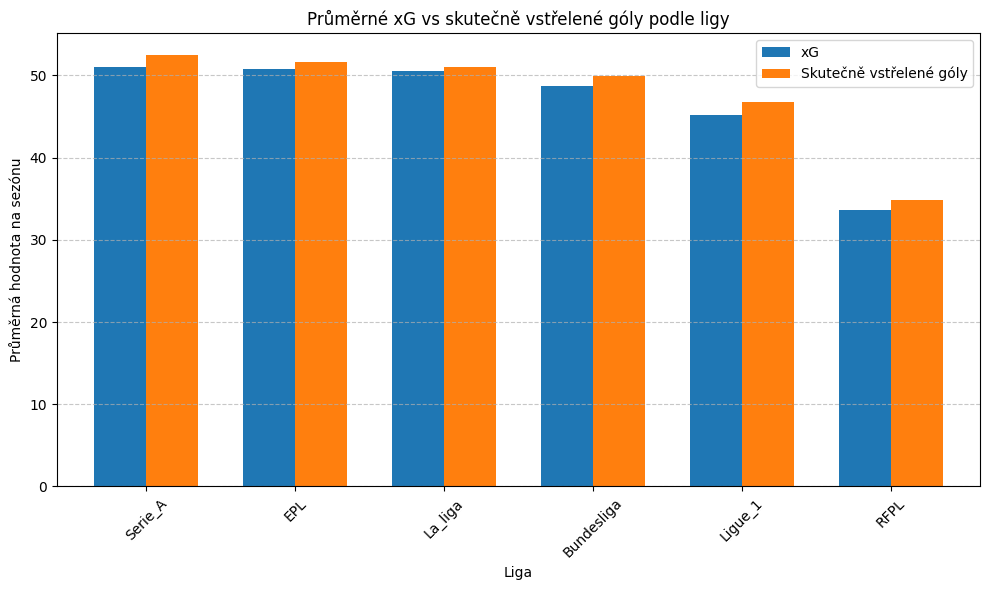

In [36]:
plt.figure(figsize=(10,6))
league_stats.plot(kind='bar', figsize=(10,6), width=0.7)
plt.title('Průměrné xG vs skutečně vstřelené góly podle ligy')
plt.ylabel('Průměrná hodnota na sezónu')
plt.xlabel('Liga')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['xG', 'Skutečně vstřelené góly'])
plt.tight_layout()
plt.show()

### Average xG and Goals scored based on the season

In [38]:
league_season_stats = (
    df.groupby(['league', 'season_year'])[['xG', 'scored']]
    .mean()
    .round(2)
    .reset_index()
)
league_season_stats.head(10)

,league,season_year,xG,scored
0,Bundesliga,2014,44.61,46.83
1,Bundesliga,2015,48.02,48.11
2,Bundesliga,2016,46.82,48.72
3,Bundesliga,2017,45.43,47.50
4,Bundesliga,2018,54.14,54.06
5,Bundesliga,2019,53.18,54.56
6,EPL,2014,48.33,48.75
7,EPL,2015,49.05,51.30
8,EPL,2016,49.18,53.20
9,EPL,2017,49.60,50.90


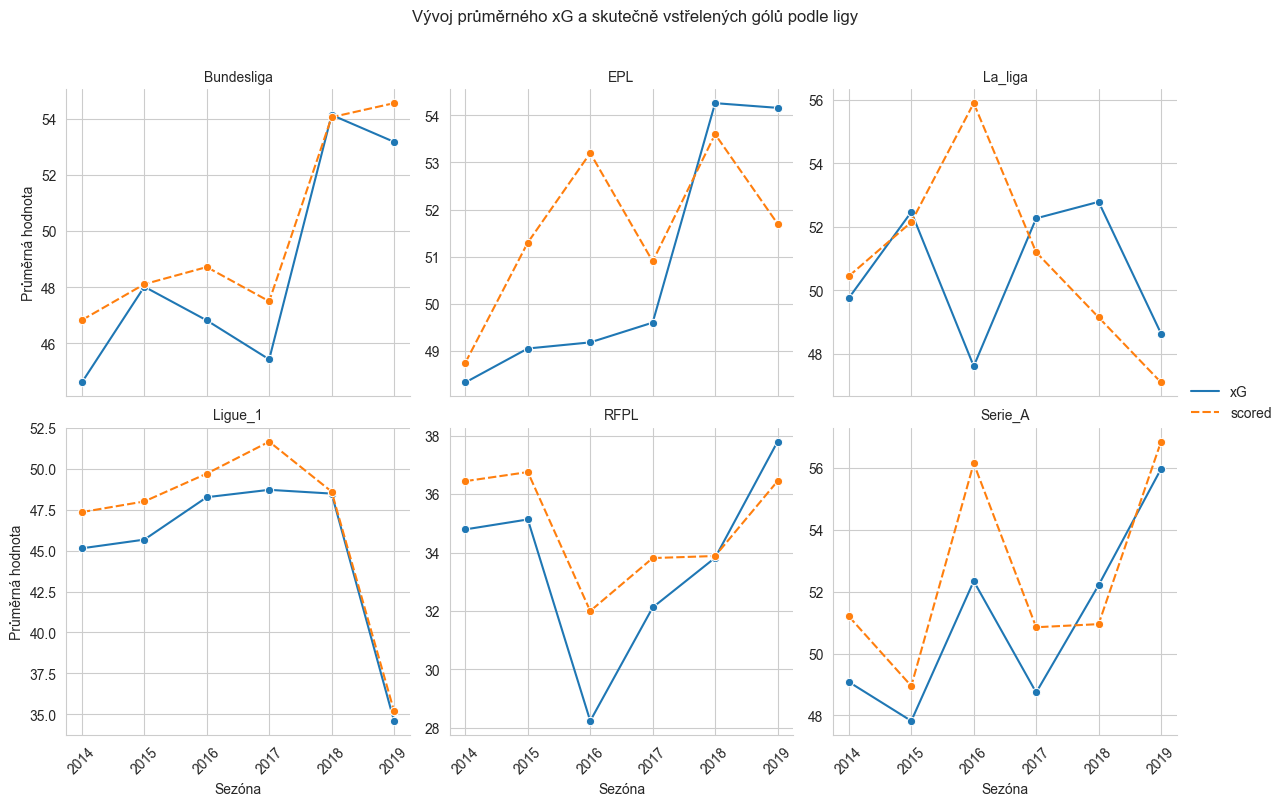

In [ ]:
long = league_season_stats.melt(
    id_vars=['league', 'season_year'],
    value_vars=['xG', 'scored'],
    var_name='metric',
    value_name='value'
)
long = long.sort_values(['league', 'season_year'])
sns.set_style("whitegrid")

palette = {'xG': '#1f77b4', 'scored': '#ff7f0e'}

g = sns.relplot(
    data=long,
    x='season_year', y='value',
    col='league', col_wrap=3, height=4, facet_kws={'sharey': False},
    kind='line', marker='o',
    hue='metric', style='metric', dashes=True, 
    palette=palette
)

g.set_axis_labels("Sezóna", "Průměrná hodnota")
g.set_titles("{col_name}")
g._legend.set_title("")  
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(top=0.88)
g.fig.suptitle("Vývoj průměrného xG a skutečně vstřelených gólů podle ligy")
plt.show()

### Goals scored and xG difference based on the season

In [43]:
xg_diff_league = (
    df.groupby(['league', 'season_year'])['xG_diff']
    .mean()
    .reset_index()
)
xg_diff_league.head(10)

,league,season_year,xG_diff
0,Bundesliga,2014,-2.223334
1,Bundesliga,2015,-0.095282
2,Bundesliga,2016,-1.904428
3,Bundesliga,2017,-2.074734
4,Bundesliga,2018,0.088920
5,Bundesliga,2019,-1.372540
6,EPL,2014,-0.424778
7,EPL,2015,-2.249743
8,EPL,2016,-4.022599
9,EPL,2017,-1.301569


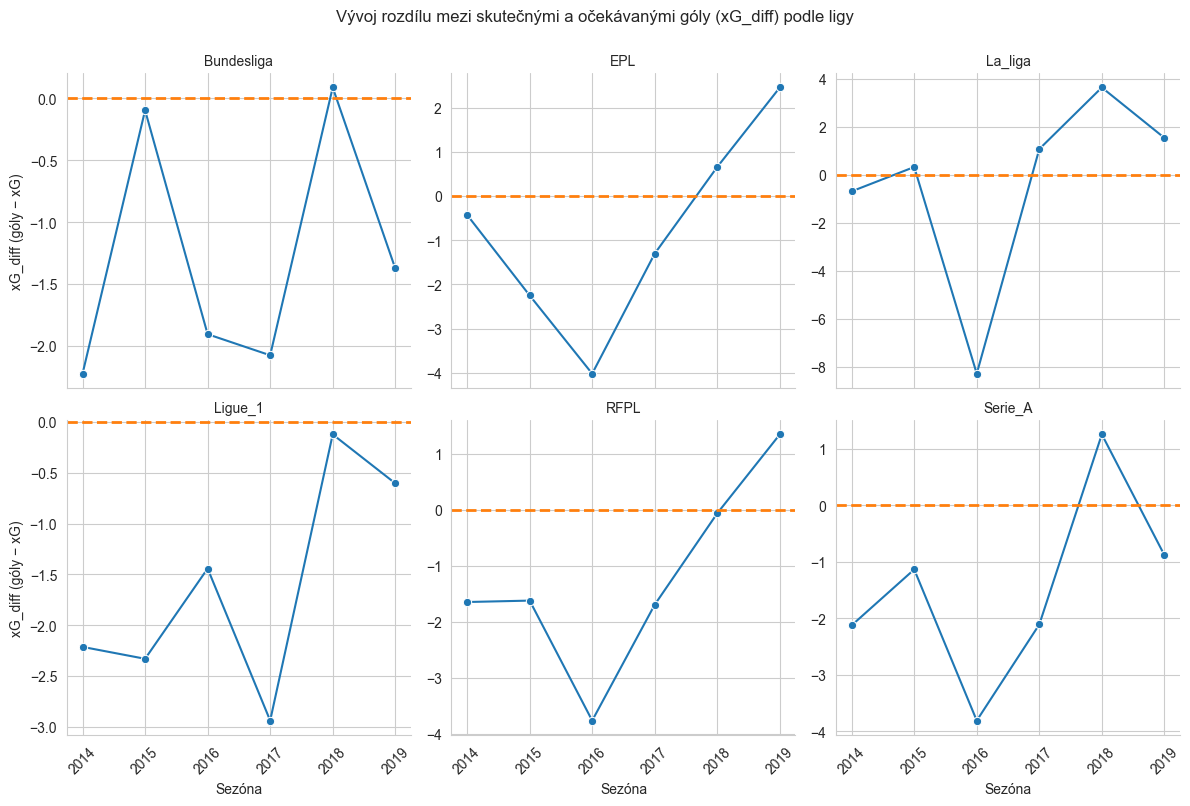

In [46]:
sns.set_style("whitegrid")

g = sns.FacetGrid(
    xg_diff_league, col="league", col_wrap=3, height=4, sharey=False
)
g.map(sns.lineplot, "season_year", "xG_diff", marker="o")

# zvýrazni přímku y = 0 oranžově
g.map(plt.axhline, y=0, color="#ff7f0e", linewidth=2, linestyle="--")

g.set_axis_labels("Sezóna", "xG_diff (góly − xG)")
g.set_titles("{col_name}")

for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(top=0.90)
g.fig.suptitle("Vývoj rozdílu mezi skutečnými a očekávanými góly (xG_diff) podle ligy")
plt.show()

- xG_diff > 0 → teams convert chances above expectations on average (overperformance).
- xG_diff < 0 → below expectations (underperformance, weaker efficiency).
- In the long term, the metric should stabilize around zero.
- Trends indicate in which leagues finishing efficiency changes over time.